# Portfolio Project: Order Delivery Time Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
from math import radians, sin, cos, acos

from scipy import stats


C:\Users\vrati\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
import pandas as pd
hr = pd.read_fwf('0.txt')

hr

,ID,0x4607
0,Delivery_person_ID,INDORES13DEL02
1,Delivery_person_Age,37.000000
2,Delivery_person_Ratings,4.900000
3,Restaurant_latitude,22.745049
4,Restaurant_longitude,75.892471
5,Delivery_location_latitude,22.765049
6,Delivery_location_longitude,75.912471
7,Order_Date,19-03-2022
8,Time_Orderd,11:30
9,Time_Order_picked,11:45


In [2]:
hr1=hr.iloc[:-1,:]
hr1

,ID,0x4607
0,Delivery_person_ID,INDORES13DEL02
1,Delivery_person_Age,37.000000
2,Delivery_person_Ratings,4.900000
3,Restaurant_latitude,22.745049
4,Restaurant_longitude,75.892471
5,Delivery_location_latitude,22.765049
6,Delivery_location_longitude,75.912471
7,Order_Date,19-03-2022
8,Time_Orderd,11:30
9,Time_Order_picked,11:45


In [3]:
col2=hr1.iloc[:,-1]
col2

0     INDORES13DEL02
1          37.000000
2           4.900000
3          22.745049
4          75.892471
5          22.765049
6          75.912471
7         19-03-2022
8              11:30
9              11:45
10             Sunny
11              High
12                 2
13             Snack
14        motorcycle
15          0.000000
16                No
17             Urban
18         24.000000
Name: 0x4607, dtype: object

In [5]:
dfv=pd.read_fwf('0.txt',header=None)

dfv=dfv[:-1]
dfv

,0,1
0,ID,0x4607
1,Delivery_person_ID,INDORES13DEL02
2,Delivery_person_Age,37.000000
3,Delivery_person_Ratings,4.900000
4,Restaurant_latitude,22.745049
5,Restaurant_longitude,75.892471
6,Delivery_location_latitude,22.765049
7,Delivery_location_longitude,75.912471
8,Order_Date,19-03-2022
9,Time_Orderd,11:30


In [6]:
vr=pd.DataFrame(dfv,columns=dfv[0].values)
vr.iloc[0]=dfv[1].values
vr.dropna(inplace=True)


In [7]:
dfv=pd.read_fwf('0.txt',header=None)

dfv=dfv[:-1]
#dfv

vr=pd.DataFrame(dfv,columns=dfv[0].values)
vr.iloc[0]=dfv[1].values
vr.dropna(inplace=True)

In [8]:
vr

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0x4607,INDORES13DEL02,37.000000,4.900000,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.000000,No,Urban,24.000000


In [9]:
# vr2=vr.copy()
# vr2

In [113]:
# vr1=dfv.transpose()
# headers=vr1.iloc[0]
# vr1.columns=[headers]
# vr1=vr1[vr1.index==1]
# vr1

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
1,0x4607,INDORES13DEL02,37.000000,4.900000,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.000000,No,Urban,24.000000


In [10]:
import numpy as np
df4=pd.DataFrame(index=np.arange(45593),columns=['ID','Delivery_person_ID','Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked','Weather conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City','Time_taken (min)'])
df4.shape


(45593, 20)

In [11]:
df4.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
import os
path = "C:\\Users\\vrati\\Downloads\\16cbaf00248311ed\\dataset\\train"
os.chdir(path)
  
# Read text File
  
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return(pd.read_fwf(f,header=None))
        

        
i=0
for file in os.listdir(path="C:\\Users\\vrati\\Downloads\\16cbaf00248311ed\\dataset\\train"):
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
        h=read_text_file(file_path)
        #h=read_text_file(file_path)
        h=h[:-1]
        v=h[1].values
        df4.loc[i]=v
        i=i+1
        


In [13]:
df4

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0x4607,INDORES13DEL02,37.000000,4.900000,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.000000,No,Urban,24.000000
1,0xb379,BANGRES18DEL02,34.000000,4.500000,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.000000,No,Metropolitian,33.000000
2,0x5d6d,BANGRES19DEL01,23.000000,4.400000,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,8:45,Sandstorms,Low,0,Drinks,motorcycle,1.000000,No,Urban,26.000000
3,0x7a6a,COIMBRES13DEL02,38.000000,4.700000,11.003669,76.976494,11.053669,77.026494,05-04-2022,17:60,18:10,Sunny,Medium,0,Buffet,motorcycle,1.000000,No,Metropolitian,21.000000
4,0x70a2,CHENRES12DEL01,32.000000,4.600000,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,13:45,Cloudy,High,1,Snack,scooter,1.000000,No,Metropolitian,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.000000,4.800000,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.000000,No,Metropolitian,32.000000
45589,0xd641,AGRRES16DEL01,21.00,4.60,0.00,0.00,0.07,0.07,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.00,No,Metropolitian,36.00
45590,0x4f8d,CHENRES08DEL03,30.000000,4.900000,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05,Cloudy,Low,1,Drinks,scooter,0.000000,No,Metropolitian,16.000000
45591,0x5eee,COIMBRES11DEL01,20.000000,4.700000,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.000000,No,Metropolitian,26.000000


In [14]:
pwd

'C:\\Users\\vrati\\Downloads\\16cbaf00248311ed\\dataset\\train'

In [15]:
cd C:\\Users\\vrati\\Downloads\\16cbaf00248311ed\\dataset\\

C:\Users\vrati\Downloads\16cbaf00248311ed\dataset


In [16]:
df4.to_csv('AmazonDataFrame.csv')

# EDA & Pre-processing

In [5]:
!pip install numpy==1.23.0

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
from math import radians, sin, cos, acos

from scipy import stats
import random

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import OrdinalEncoder

In [8]:
df = pd.read_csv('AmazonDataFrame.csv')

In [9]:
df.shape  #How Big is the data

(45593, 21)

In [10]:
df.sample(10) # How does the data look like

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
39020,39020,0xb40b,BANGRES01DEL01,36.0,5.0,12.933284,77.615428,12.943284,77.625428,28-03-2022,...,8:40,Stormy,Low,2,Snack,scooter,0.0,No,Metropolitian,29.0
1981,1981,0x8016,CHENRES18DEL01,35.0,4.3,12.981615,80.231598,12.991615,80.241598,11-03-2022,...,11:35,Sandstorms,High,1,Buffet,scooter,1.0,No,Metropolitian,33.0
17562,17562,0x44b4,PUNERES18DEL03,31.0,3.8,18.593481,73.785901,18.683481,73.875901,06-04-2022,...,18:35,Sandstorms,Medium,1,Buffet,motorcycle,NaN,No,Metropolitian,38.0
31827,31827,0x2832,BANGRES11DEL02,22.0,4.9,12.934365,77.616155,12.954365,77.636155,26-03-2022,...,11:60,Cloudy,High,1,Drinks,scooter,1.0,No,Metropolitian,25.0
10863,10863,0x7296,RANCHIRES16DEL02,25.0,4.6,23.371292,85.327872,23.421292,85.377872,15-03-2022,...,20:10,Sandstorms,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,33.0
30142,30142,0x7003,PUNERES20DEL02,23.0,4.8,18.592718,73.773572,18.672718,73.853572,14-03-2022,...,18:40,Fog,Medium,0,Meal,motorcycle,0.0,No,Metropolitian,43.0
12212,12212,0x5310,MYSRES010DEL02,30.0,3.5,12.321214,76.621094,12.401214,76.701094,04-03-2022,...,19:55,Stormy,Jam,1,Buffet,motorcycle,0.0,No,Metropolitian,32.0
23240,23240,0x9b00,JAPRES18DEL02,29.0,4.9,26.913987,75.752891,26.993987,75.832891,27-03-2022,...,18:45,Windy,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,25.0
5460,5460,0x2169,HYDRES04DEL01,22.0,4.4,17.411028,78.329645,17.451028,78.369645,19-03-2022,...,15:05,Stormy,High,0,Drinks,motorcycle,1.0,Yes,Urban,39.0
29825,29825,0x3764,INDORES02DEL03,22.0,4.5,22.651847,75.881991,22.711847,75.941991,05-04-2022,...,17:35,Windy,Medium,0,Snack,motorcycle,0.0,No,Metropolitian,20.0


In [11]:
df.info()  #What is the datatype of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   45593 non-null  int64  
 1   ID                           45593 non-null  object 
 2   Delivery_person_ID           45593 non-null  object 
 3   Delivery_person_Age          43739 non-null  float64
 4   Delivery_person_Ratings      43685 non-null  float64
 5   Restaurant_latitude          45593 non-null  float64
 6   Restaurant_longitude         45593 non-null  float64
 7   Delivery_location_latitude   45593 non-null  float64
 8   Delivery_location_longitude  45593 non-null  float64
 9   Order_Date                   45593 non-null  object 
 10  Time_Orderd                  43862 non-null  object 
 11  Time_Order_picked            45593 non-null  object 
 12  Weather conditions           44977 non-null  object 
 13  Road_traffic_den

- Delivery_person_Age	Delivery_person_Ratings	Restaurant_latitude	Restaurant_longitude	Delivery_location_latitude	Delivery_location_longitude,Vehicle_condition,multiple_deliveries should be numerical data.

- Order_Date, Time_Orderd, Time_Order_picked, Time_taken (min)should be datetime data

## Converting columns to necessary Datatypes 

In [12]:
df1=df.copy()
df1[['Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Vehicle_condition','multiple_deliveries','Time_taken (min)']]=df1[['Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Vehicle_condition','multiple_deliveries','Time_taken (min)']].astype("float") 


In [13]:

df1['Order_Date']=pd.to_datetime(df1['Order_Date'])

df1['Time_Orderd'] = pd.to_datetime(df1['Time_Orderd'],format='%M:%S')

df1['Time_Order_picked'] = pd.to_datetime(df1['Time_Order_picked'],format='%M:%S')



In [14]:
df1.info() #Columns are now in their appropriate datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   45593 non-null  int64         
 1   ID                           45593 non-null  object        
 2   Delivery_person_ID           45593 non-null  object        
 3   Delivery_person_Age          43739 non-null  float64       
 4   Delivery_person_Ratings      43685 non-null  float64       
 5   Restaurant_latitude          45593 non-null  float64       
 6   Restaurant_longitude         45593 non-null  float64       
 7   Delivery_location_latitude   45593 non-null  float64       
 8   Delivery_location_longitude  45593 non-null  float64       
 9   Order_Date                   45593 non-null  datetime64[ns]
 10  Time_Orderd                  43862 non-null  datetime64[ns]
 11  Time_Order_picked            45593 non-nu

In [15]:
# Numerical Columns

Numeric = df1.select_dtypes(include=np.number)
Numeric.shape

(45593, 10)

In [16]:
Numeric.head()

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
0,0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2.0,0.0,24.0
1,1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2.0,1.0,33.0
2,2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,0.0,1.0,26.0
3,3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0.0,1.0,21.0
4,4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1.0,1.0,30.0


In [17]:
# Categorical Columns

Categorical = df1.select_dtypes(include='object')
Categorical.shape

(45593, 8)

In [18]:
Categorical.head()

,ID,Delivery_person_ID,Weather conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,0x4607,INDORES13DEL02,Sunny,High,Snack,motorcycle,No,Urban
1,0xb379,BANGRES18DEL02,Stormy,Jam,Snack,scooter,No,Metropolitian
2,0x5d6d,BANGRES19DEL01,Sandstorms,Low,Drinks,motorcycle,No,Urban
3,0x7a6a,COIMBRES13DEL02,Sunny,Medium,Buffet,motorcycle,No,Metropolitian
4,0x70a2,CHENRES12DEL01,Cloudy,High,Snack,scooter,No,Metropolitian


## Removing the column Unnamed,  ID,Delivery_person_ID columns as they is not needed

In [19]:
df1.drop(columns=['Unnamed: 0','ID','Delivery_person_ID'],inplace=True)

## Checking for Missing Values

In [20]:
df1.isna().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

- Missing values are present in Delivery_person_Age, Delivery_person_Ratings,Time_Orderd,Weather conditions,Road_traffic_density, multiple_deliveries,Festival,City 

In [21]:
df1.shape[0]*0.10  # This is the value of 10% of the data. 

4559.3

- All the missing values in the individual columns are less than 10% of the data present.

In [22]:
df1.describe()  # How does the data look like mathematically

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43739.000000,43685.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,44600.000000,45593.000000
mean,29.567137,4.633780,17.017729,70.231332,17.465186,70.845702,1.023359,0.744664,26.294607
std,5.815155,0.334716,8.185109,22.883647,7.335122,21.118812,0.839065,0.572473,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


## Creating a column Delivery_Distance which will specify distance between Restaurant & Delivery Locations 

In [23]:
# Code to find distance using latitude and longitude

res_lat=np.radians(df1['Restaurant_latitude'].values)

res_long = np.radians(df1['Restaurant_longitude'].values)

del_lat = np.radians(df1['Delivery_location_latitude'].values)

del_long = np.radians(df1['Delivery_location_longitude'].values)
#slat = math.radians(df1['Restaurant_latitude'].values)
#slat.head()
# slon = radians(float(input("Ending longitude: ")))
# elat = radians(float(input("Starting latitude: ")))
# elon = radians(float(input("Ending longitude: ")))

dist = 6371.01 * np.arccos(np.sin(res_lat)*np.sin(del_lat) + np.cos(res_lat)*np.cos(del_lat)*np.cos(res_long - del_long))
dist
# Gives Distance in kms

array([ 3.02515403, 20.18356141,  1.55276024, ...,  4.6572027 ,
        6.23240283, 12.07441448])

In [24]:
df1['Delivery_Distance(kms)'] = dist
df1.head()    # Distances are correct. Verified using online distance calculator

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_Distance(kms)
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,1900-01-01 00:11:30,1900-01-01 00:11:45,Sunny,High,2.0,Snack,motorcycle,0.0,No,Urban,24.0,3.025154
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,1900-01-01 00:19:45,1900-01-01 00:19:50,Stormy,Jam,2.0,Snack,scooter,1.0,No,Metropolitian,33.0,20.183561
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,1900-01-01 00:08:30,1900-01-01 00:08:45,Sandstorms,Low,0.0,Drinks,motorcycle,1.0,No,Urban,26.0,1.552760
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,1900-01-01 00:18:00,1900-01-01 00:18:10,Sunny,Medium,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,7.790414
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,1900-01-01 00:13:30,1900-01-01 00:13:45,Cloudy,High,1.0,Snack,scooter,1.0,No,Metropolitian,30.0,6.210148


## Removing the 4 columns describing Co-ordinates as we have more relevant column Delivery Distance that describes the distance betn Restaurant and Delivery Location better

In [25]:
df1.drop(columns=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],inplace=True)
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_Distance(kms)
0,37.0,4.9,2022-03-19,1900-01-01 00:11:30,1900-01-01 00:11:45,Sunny,High,2.0,Snack,motorcycle,0.0,No,Urban,24.0,3.025154
1,34.0,4.5,2022-03-25,1900-01-01 00:19:45,1900-01-01 00:19:50,Stormy,Jam,2.0,Snack,scooter,1.0,No,Metropolitian,33.0,20.183561
2,23.0,4.4,2022-03-19,1900-01-01 00:08:30,1900-01-01 00:08:45,Sandstorms,Low,0.0,Drinks,motorcycle,1.0,No,Urban,26.0,1.552760
3,38.0,4.7,2022-05-04,1900-01-01 00:18:00,1900-01-01 00:18:10,Sunny,Medium,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,7.790414
4,32.0,4.6,2022-03-26,1900-01-01 00:13:30,1900-01-01 00:13:45,Cloudy,High,1.0,Snack,scooter,1.0,No,Metropolitian,30.0,6.210148


In [26]:
df1.shape

(45593, 15)

## Getting the time difference between order placed & order picked up

### Converting time columns to time

In [27]:
# df1['Time_Orderd']=df1['Time_Orderd'].dt.time
# df1['Time_Order_picked'] = df1['Time_Order_picked'].dt.time

In [28]:
(df1['Time_Order_picked'] - df1['Time_Orderd']) / np.timedelta64(1,'s')  

0        15.0
1         5.0
2        15.0
3        10.0
4        15.0
         ... 
45588    10.0
45589    15.0
45590    15.0
45591     5.0
45592     5.0
Length: 45593, dtype: float64

- Though we have written(1,'s') but the time difference is in minutes as initially the time was defined as %M%S

In [29]:
time_diff = (df1['Time_Order_picked'] - df1['Time_Orderd']) / np.timedelta64(1,'s')  
df1['Order_timeDiff'] = time_diff
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_Distance(kms),Order_timeDiff
0,37.0,4.9,2022-03-19,1900-01-01 00:11:30,1900-01-01 00:11:45,Sunny,High,2.0,Snack,motorcycle,0.0,No,Urban,24.0,3.025154,15.0
1,34.0,4.5,2022-03-25,1900-01-01 00:19:45,1900-01-01 00:19:50,Stormy,Jam,2.0,Snack,scooter,1.0,No,Metropolitian,33.0,20.183561,5.0
2,23.0,4.4,2022-03-19,1900-01-01 00:08:30,1900-01-01 00:08:45,Sandstorms,Low,0.0,Drinks,motorcycle,1.0,No,Urban,26.0,1.552760,15.0
3,38.0,4.7,2022-05-04,1900-01-01 00:18:00,1900-01-01 00:18:10,Sunny,Medium,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,7.790414,10.0
4,32.0,4.6,2022-03-26,1900-01-01 00:13:30,1900-01-01 00:13:45,Cloudy,High,1.0,Snack,scooter,1.0,No,Metropolitian,30.0,6.210148,15.0


### Removing Time_Orderd,Time_Order_picked columns as now we have more relevant column that is Time difference. 

In [30]:
df1.drop(columns=['Time_Orderd','Time_Order_picked'],inplace=True)
df1.shape

(45593, 14)

In [31]:
df1.isna().sum()

Delivery_person_Age        1854
Delivery_person_Ratings    1908
Order_Date                    0
Weather conditions          616
Road_traffic_density        601
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries         993
Festival                    228
City                       1200
Time_taken (min)              0
Delivery_Distance(kms)        0
Order_timeDiff             1731
dtype: int64

## Checking the correlation

In [32]:
# Updating Numeric Columns

Numeric = df1.select_dtypes(include=np.number)
Numeric.shape

(45593, 7)

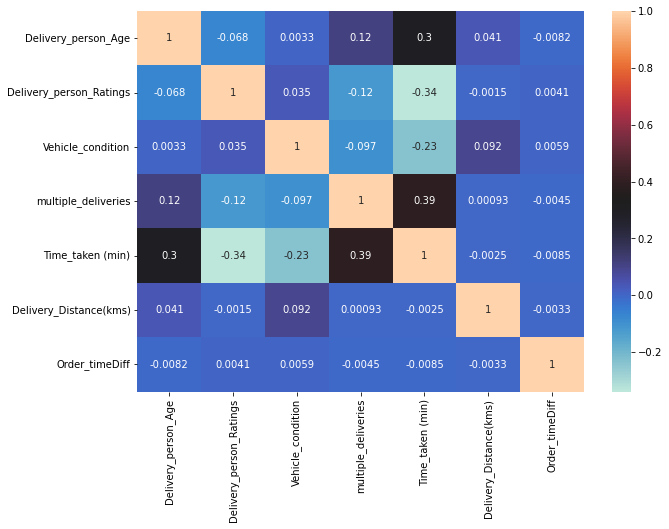

In [33]:
# Checking the correlation

correlation = Numeric.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation,cmap='icefire',annot=True)
plt.show()

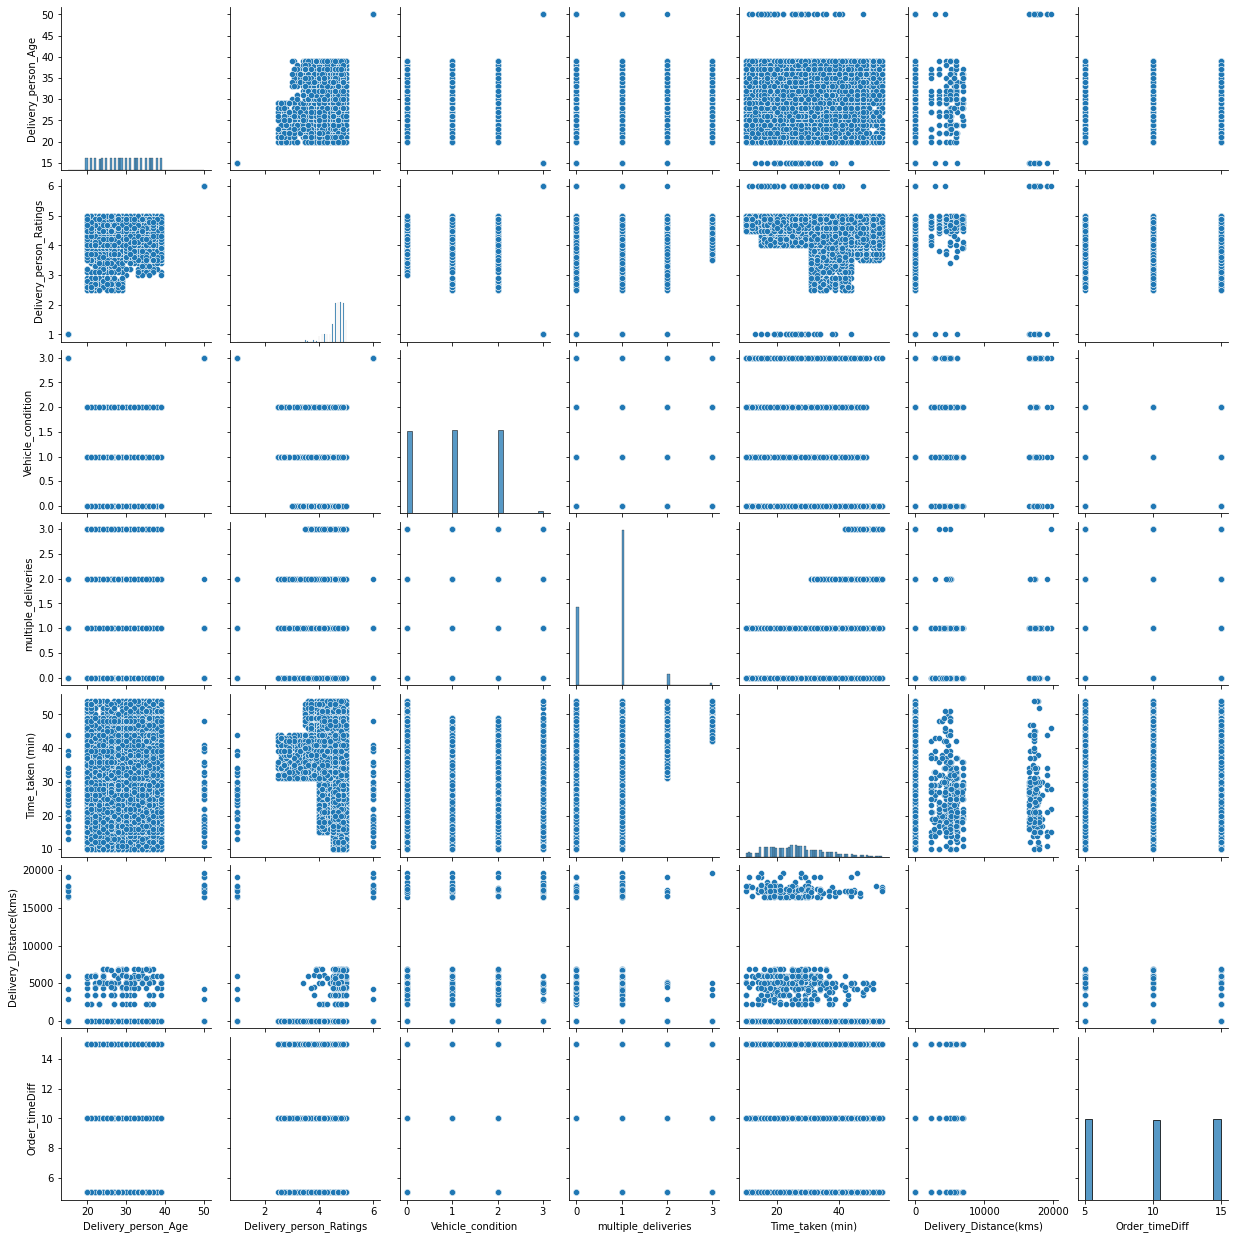

In [34]:
#Checking the entire data distribution
sns.pairplot(Numeric) 

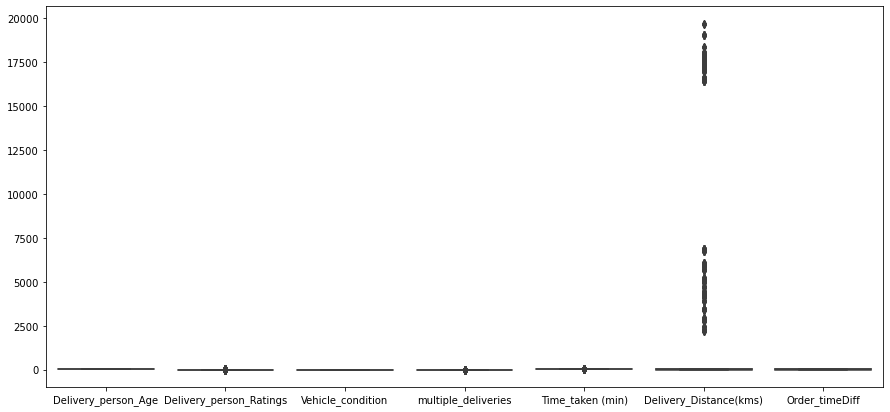

In [35]:
#Checking columns having outliers
plt.figure(figsize=(15,7))
sns.boxplot(data=Numeric)
plt.show()

- There are outliers in Delivery_Distance(kms) column

### Checking the data distribution of Target Variable / Y : Column Time_taken(min)

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time_taken (min)', ylabel='Density'>

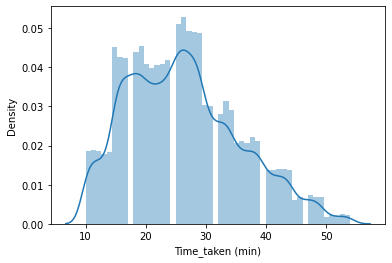

In [36]:

sns.distplot(df1['Time_taken (min)'])

<AxesSubplot:xlabel='Time_taken (min)', ylabel='Density'>

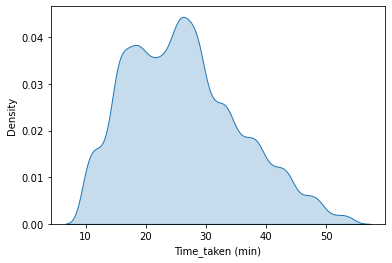

In [37]:
sns.kdeplot(df1['Time_taken (min)'],shade=True)

((array([-4.17040688, -3.96367538, -3.85092896, ...,  3.85092896,
          3.96367538,  4.17040688]),
  array([10., 10., 10., ..., 54., 54., 54.])),
 (9.261404517283026, 26.294606628210467, 0.9868779517113678))

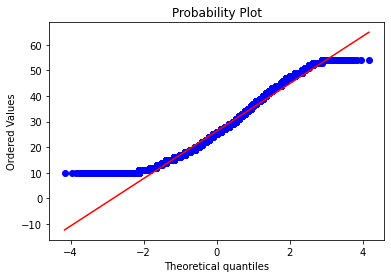

In [38]:
stats.probplot(df1['Time_taken (min)'],dist='norm',plot=plt)

In [39]:
df1['Time_taken (min)'].skew() 

0.4859512298743323

<AxesSubplot:ylabel='Time_taken (min)'>

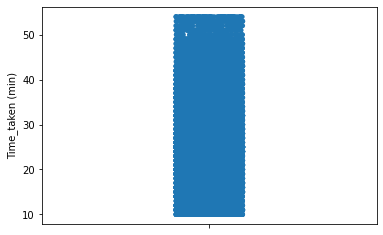

In [40]:
sns.stripplot(y=df1['Time_taken (min)']) #It is used to visualize the distribution of data points of the variable | Univariate analysis

# Visualizing the data for Handling missing values

In [41]:
df1.isnull().mean()*100  # Missing value percent in each column

Delivery_person_Age        4.066414
Delivery_person_Ratings    4.184853
Order_Date                 0.000000
Weather conditions         1.351085
Road_traffic_density       1.318185
Vehicle_condition          0.000000
Type_of_order              0.000000
Type_of_vehicle            0.000000
multiple_deliveries        2.177966
Festival                   0.500077
City                       2.631983
Time_taken (min)           0.000000
Delivery_Distance(kms)     0.000000
Order_timeDiff             3.796635
dtype: float64

### Column: Delivery_person_Age

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Density'>

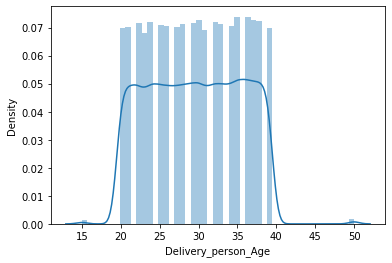

In [42]:
sns.distplot(df1['Delivery_person_Age'])

In [43]:
df1['Delivery_person_Age'].skew()

0.01866933501009544

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_person_Age'>

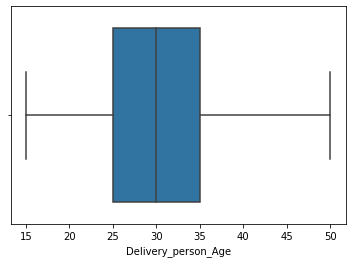

In [44]:
sns.boxplot(df1['Delivery_person_Age'])  # No outliers

In [45]:
df1['Delivery_person_Age'].min()

15.0

In [46]:
df1['Delivery_person_Age'].max()

50.0

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Time_taken (min)'>

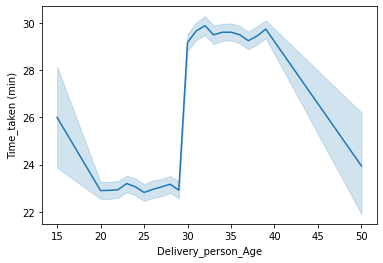

In [47]:
sns.lineplot(df1['Delivery_person_Age'],df1['Time_taken (min)'])

- Most time to deliver orders is taken by persons of age between 30 to 40 approx.

In [48]:
df1_age=df1[df1['Time_taken (min)'] == df1['Time_taken (min)'].max()]['Delivery_person_Age']
df1_age

188      38.0
641      20.0
2373     31.0
3103     39.0
3711     24.0
         ... 
43537    31.0
43668    32.0
43930    38.0
44283    36.0
45043    39.0
Name: Delivery_person_Age, Length: 91, dtype: float64

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

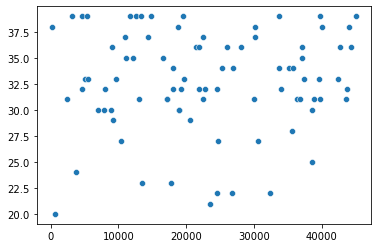

In [49]:
sns.scatterplot(df1_age.index,df1_age.values)

- Maximum delivery time is taken by persons within age interval 20 to 38.
- Amongst that interval, most time to deliver order is taken by person above age 30, i.e. between 30 to 38 age.

In [50]:
df2_age=df1[df1['Time_taken (min)'] == df1['Time_taken (min)'].min()]['Delivery_person_Age']
df2_age

36       20.0
75       26.0
378      24.0
485      28.0
611      26.0
         ... 
45362    20.0
45364    28.0
45379    24.0
45443    20.0
45565    24.0
Name: Delivery_person_Age, Length: 750, dtype: float64

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

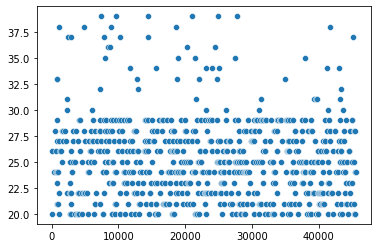

In [51]:
sns.scatterplot(df2_age.index,df2_age.values)

- Least time to deliver is taken by persons below age 37 and above age 20.
- Most efficient delivery,i.e, least time of delivery is taken by persons with age between 20 to 29 years of age.


### Insights: 
- Age column distribution is Normal / close to Normal distribution.
- There are no Outliers present.
- Hence we can fill the missing values with mean of Age.

=====================================================
- Maximum delivery time is taken by persons within age interval 22 to 38.
- Amongst that interval, most time to deliver order is taken by person above age 30, i.e. between 30 to 38 age.
- Least time to deliver is taken by persons below age 37 and above age 20.
- Most efficient delivery,i.e, least time of delivery is taken by persons with age between 20 to 29 years of age.

### Column: Delivery_person_Ratings

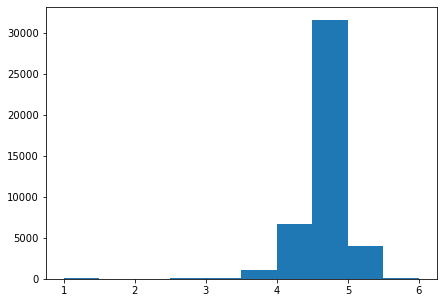

In [52]:
plt.figure(figsize=(7,5))
plt.hist(df1['Delivery_person_Ratings'])
plt.show()

In [53]:
df1['Delivery_person_Ratings'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, nan,
       3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4,
       2.8, 2.9, 3. ])

In [54]:
df1['Delivery_person_Ratings'].skew()

-2.4935515971807916

In [55]:
df1['Delivery_person_Ratings'].value_counts()

4.8    7148
4.7    7142
4.9    7041
4.6    6940
5.0    3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6.0      53
1.0      38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: Delivery_person_Ratings, dtype: int64

In [56]:
(1908/df.shape[0])*100

4.184852937951001

In [57]:
df1[df1['Delivery_person_Ratings'].isnull()]  # Data is missing at random

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_Distance(kms),Order_timeDiff
42,NaN,NaN,2022-06-04,Cloudy,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,33.0,12.236743,NaN
74,NaN,NaN,2022-11-03,NaN,NaN,1.0,Drinks,scooter,0.0,No,Metropolitian,19.0,6.210599,NaN
120,NaN,NaN,2022-02-04,NaN,NaN,3.0,Snack,electric_scooter,0.0,No,Metropolitian,25.0,16.659864,NaN
127,23.0,NaN,2022-02-17,Sunny,Low,0.0,Drinks,motorcycle,0.0,No,Metropolitian,15.0,4.540328,10.0
140,NaN,NaN,2022-09-03,Stormy,Low,2.0,Snack,scooter,0.0,No,NaN,19.0,4.596584,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45508,NaN,NaN,2022-03-23,Fog,Medium,0.0,Meal,motorcycle,1.0,No,Urban,36.0,10.756290,5.0
45518,NaN,NaN,2022-03-19,NaN,NaN,3.0,Snack,electric_scooter,0.0,No,Metropolitian,25.0,1.512694,NaN
45519,NaN,NaN,2022-02-13,NaN,NaN,3.0,Meal,electric_scooter,1.0,No,Urban,17.0,1.488331,NaN
45526,NaN,NaN,2022-03-27,Cloudy,Jam,2.0,Snack,scooter,0.0,No,Metropolitian,48.0,16.384360,10.0


- Replacing Ratings with Reviews by adding a Review column

In [58]:

df2=df1.copy()


In [59]:

df1.loc[df1['Delivery_person_Ratings'] >=5, 'Review'] = 'Excellent'
df1.loc[((df1['Delivery_person_Ratings']<5) & (df1['Delivery_person_Ratings']>=4.5)),'Review'] = 'Very Good'
df1.loc[((df1['Delivery_person_Ratings']>=4) & (df1['Delivery_person_Ratings']<4.5)),'Review' ] = 'Good'
df1.loc[((df1['Delivery_person_Ratings']>=3.5) & (df1['Delivery_person_Ratings']<4)),'Review' ] = 'Bad'
df1.loc[df1['Delivery_person_Ratings']<3.5,'Review'] = 'Very Bad'

In [60]:
df1.sample(5)

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_Distance(kms),Order_timeDiff,Review
32321,22.0,4.5,2022-03-18,Windy,Jam,1.0,Meal,motorcycle,1.0,No,Metropolitian,22.0,19.894301,15.0,Very Good
9752,NaN,NaN,2022-02-14,Sandstorms,Medium,0.0,Snack,motorcycle,1.0,No,Metropolitian,48.0,13.481668,NaN,NaN
808,36.0,4.6,2022-02-18,Stormy,Low,1.0,Meal,scooter,0.0,No,Metropolitian,25.0,12.580288,15.0,Very Good
27074,39.0,4.1,2022-03-30,Sandstorms,Medium,0.0,Drinks,motorcycle,2.0,No,NaN,37.0,5.958856,15.0,Good
16790,22.0,4.8,2022-09-03,Sandstorms,Low,2.0,Meal,scooter,1.0,No,Urban,13.0,3.040560,15.0,Very Good


C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Review', ylabel='count'>

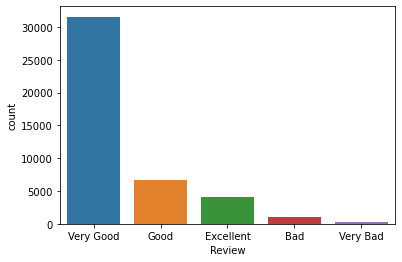

In [61]:
sns.countplot(df1['Review'])  # We can now fill the missing values with mode

- Most number of reviews are Very Good 

In [62]:
df1['Review'].value_counts()

Very Good    31574
Good          6695
Excellent     4049
Bad           1106
Very Bad       261
Name: Review, dtype: int64

In [63]:
df1['Review'].mode()

0    Very Good
dtype: object

 - Now, the data is categorical and mode value is significantly high, so we can replace missing values with Mode

In [64]:
df1.drop(columns=['Delivery_person_Ratings'],inplace=True) #Dropping Ratings column as we now have Review column

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Review', ylabel='count'>

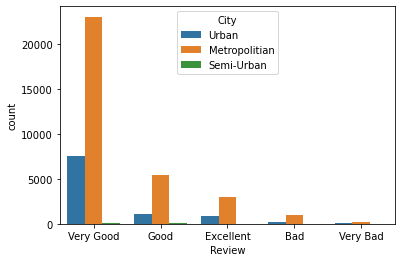

In [65]:
sns.countplot(df1['Review'],hue=df1['City'])  

In [66]:
df1.groupby('City')['Review'].value_counts()

City           Review   
Metropolitian  Very Good    23039
               Good          5457
               Excellent     3016
               Bad            929
               Very Bad       215
Semi-Urban     Very Good       78
               Good            53
               Excellent       12
               Bad              9
Urban          Very Good     7575
               Good          1051
               Excellent      919
               Bad            153
               Very Bad        42
Name: Review, dtype: int64

- Maximum number of Very Good Reviews are obtained in Metropolitan Cities followed by Urban.
- Reviews received from Semi-Urban cities are very low.
- Very bad reviews are obtained in Metropolitan cities (Maximum count) & Urban cities.

### Insights:
- Data was Missing at Random. 
- We have replaced Ratings column with a new Categorical Column Review
- Count of 'Very Good'values is significantly high, which means the mode value is significant. Hence we can replace the missing values with mode.

============================
- Most number of reviews are Very Good
- Maximum number of Very Good Reviews are obtained in Metropolitan Cities followed by Urban.
- Reviews received from Semi-Urban cities are very low.
- Very bad reviews are obtained in Metropolitan cities (Maximum count) & Urban cities.

### Column: Weather conditions

In [67]:


df1['Weather conditions'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weather conditions', ylabel='count'>

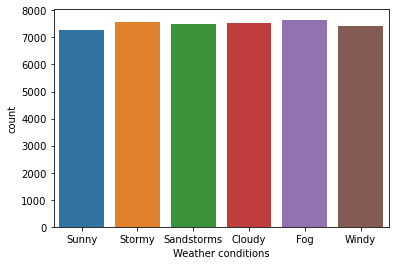

In [68]:
sns.countplot(df1['Weather conditions'])

In [69]:
df1['Weather conditions'].value_counts()

Fog           7654
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
Name: Weather conditions, dtype: int64

- There is not much significant difference in mode & other values hence missing values cannot be replaced with mode.

In [70]:
df1['Weather conditions'].isna().sum()   

616

In [71]:
df1[df1['Weather conditions'].isna()] #Data is missing at Random

,Delivery_person_Age,Order_Date,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_Distance(kms),Order_timeDiff,Review
74,NaN,2022-11-03,NaN,NaN,1.0,Drinks,scooter,0.0,No,Metropolitian,19.0,6.210599,NaN,NaN
120,NaN,2022-02-04,NaN,NaN,3.0,Snack,electric_scooter,0.0,No,Metropolitian,25.0,16.659864,NaN,NaN
250,NaN,2022-08-03,NaN,NaN,3.0,Buffet,motorcycle,1.0,Yes,Urban,43.0,16.852592,NaN,NaN
348,NaN,2022-02-03,NaN,NaN,3.0,Drinks,scooter,1.0,No,Metropolitian,26.0,20.182666,NaN,NaN
425,NaN,2022-02-18,NaN,NaN,3.0,Snack,scooter,1.0,No,Metropolitian,20.0,17744.232939,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45332,50.0,2022-03-19,NaN,NaN,3.0,Drinks,electric_scooter,1.0,No,Urban,28.0,3.145072,NaN,Excellent
45394,NaN,2022-05-03,NaN,NaN,3.0,Buffet,bicycle,1.0,No,Metropolitian,21.0,4.717608,NaN,NaN
45504,NaN,2022-03-17,NaN,NaN,3.0,Meal,scooter,1.0,No,NaN,24.0,17340.730041,NaN,NaN
45518,NaN,2022-03-19,NaN,NaN,3.0,Snack,electric_scooter,0.0,No,Metropolitian,25.0,1.512694,NaN,NaN


In [72]:
(616/df1.shape[0])*100  

1.3510845963196105

- Missing data is 1.35% so data can be filled randomly

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weather conditions', ylabel='Time_taken (min)'>

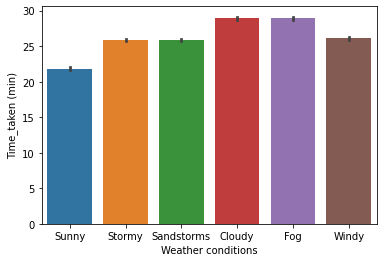

In [73]:
sns.barplot(df1['Weather conditions'],df1['Time_taken (min)'])

- Time taken to deliver order is highest in Cloudy Conditions & Fog followed by Stormy weather.
- Time taken to deliver is minimal on Sunny weathers

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weather conditions', ylabel='Time_taken (min)'>

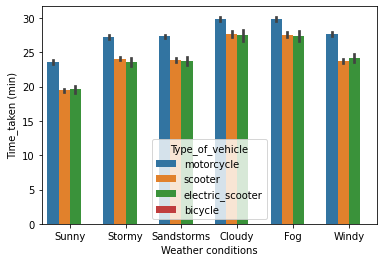

In [74]:
sns.barplot(df1['Weather conditions'],df1['Time_taken (min)'],hue=df1['Type_of_vehicle'])

- Most efficient type of vehicle in Cloudy & Fog weathers is electric scooter.

### Insights:
- Count of all the unique Categorical values in this column are very near to each other. Mode value is not significantly higher than others hence we cannot replace the missing values with mode.
- Missing data is 1.35% hence can fill the data with random.choice

=========================================

- Time taken to deliver order is highest in Cloudy Conditions & Fog followed by Stormy weather.
- Time taken to deliver is minimal on Sunny weathers
- Most efficient type of vehicle in Cloudy & Fog weathers is electric scooter.

### Column: Road_traffic_density

In [75]:
df1['Road_traffic_density'].unique()

array(['High', 'Jam', 'Low', 'Medium', nan], dtype=object)

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Road_traffic_density', ylabel='count'>

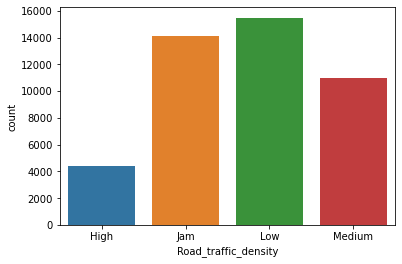

In [76]:
sns.countplot(df1['Road_traffic_density']) 

- Maximum road traffic density is Low

In [77]:
df1['Road_traffic_density'].value_counts()

Low       15477
Jam       14143
Medium    10947
High       4425
Name: Road_traffic_density, dtype: int64

In [78]:
df1['Road_traffic_density'][df1['Road_traffic_density'].isnull()].index # Data is missing at Random

Int64Index([   74,   120,   250,   348,   425,   431,   499,   534,   596,
              610,
            ...
            44962, 45020, 45032, 45067, 45288, 45332, 45394, 45504, 45518,
            45519],
           dtype='int64', length=601)

<AxesSubplot:xlabel='Weather conditions'>

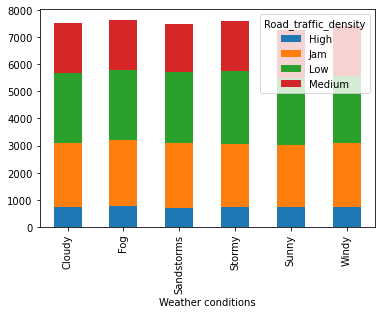

In [79]:
pd.crosstab(df1['Weather conditions'],df1['Road_traffic_density']).plot.bar(stacked=True)

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weather conditions', ylabel='count'>

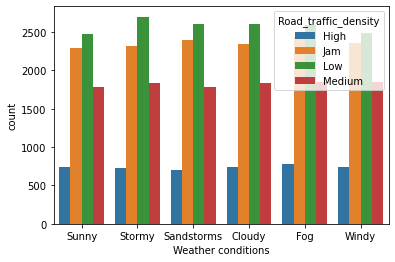

In [80]:
sns.countplot('Weather conditions',hue='Road_traffic_density',data=df1) 

- Weather conditions dont seem to have very much difference in Traffic as per the data

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Road_traffic_density', ylabel='count'>

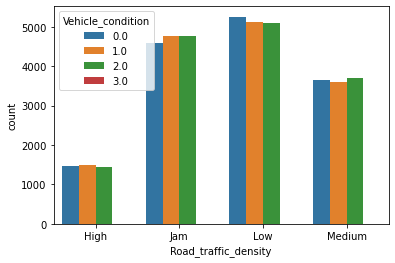

In [81]:

sns.countplot('Road_traffic_density',hue='Vehicle_condition',data=df1)

In [82]:
(df1['Road_traffic_density'].isna().sum() / df1.shape[0] ) *100

1.318184809071568

In [83]:
df1[df1['Road_traffic_density'].isna()] #Data is missing completely at random

,Delivery_person_Age,Order_Date,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_Distance(kms),Order_timeDiff,Review
74,NaN,2022-11-03,NaN,NaN,1.0,Drinks,scooter,0.0,No,Metropolitian,19.0,6.210599,NaN,NaN
120,NaN,2022-02-04,NaN,NaN,3.0,Snack,electric_scooter,0.0,No,Metropolitian,25.0,16.659864,NaN,NaN
250,NaN,2022-08-03,NaN,NaN,3.0,Buffet,motorcycle,1.0,Yes,Urban,43.0,16.852592,NaN,NaN
348,NaN,2022-02-03,NaN,NaN,3.0,Drinks,scooter,1.0,No,Metropolitian,26.0,20.182666,NaN,NaN
425,NaN,2022-02-18,NaN,NaN,3.0,Snack,scooter,1.0,No,Metropolitian,20.0,17744.232939,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45332,50.0,2022-03-19,NaN,NaN,3.0,Drinks,electric_scooter,1.0,No,Urban,28.0,3.145072,NaN,Excellent
45394,NaN,2022-05-03,NaN,NaN,3.0,Buffet,bicycle,1.0,No,Metropolitian,21.0,4.717608,NaN,NaN
45504,NaN,2022-03-17,NaN,NaN,3.0,Meal,scooter,1.0,No,NaN,24.0,17340.730041,NaN,NaN
45518,NaN,2022-03-19,NaN,NaN,3.0,Snack,electric_scooter,0.0,No,Metropolitian,25.0,1.512694,NaN,NaN


In [84]:
#Data is ordinal, Low to Jam increasing order of rank
df1['Road_traffic_density'] = df1['Road_traffic_density'].map({"Low":0,"Medium":1,"High":2,"Jam":3})

In [85]:
df1.head()

,Delivery_person_Age,Order_Date,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_Distance(kms),Order_timeDiff,Review
0,37.0,2022-03-19,Sunny,2.0,2.0,Snack,motorcycle,0.0,No,Urban,24.0,3.025154,15.0,Very Good
1,34.0,2022-03-25,Stormy,3.0,2.0,Snack,scooter,1.0,No,Metropolitian,33.0,20.183561,5.0,Very Good
2,23.0,2022-03-19,Sandstorms,0.0,0.0,Drinks,motorcycle,1.0,No,Urban,26.0,1.552760,15.0,Good
3,38.0,2022-05-04,Sunny,1.0,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,7.790414,10.0,Very Good
4,32.0,2022-03-26,Cloudy,2.0,1.0,Snack,scooter,1.0,No,Metropolitian,30.0,6.210148,15.0,Very Good


C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Road_traffic_density', ylabel='Time_taken (min)'>

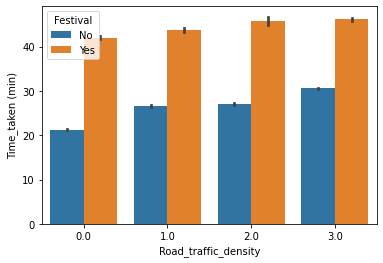

In [86]:

sns.barplot(df1['Road_traffic_density'],df1['Time_taken (min)'],hue=df1['Festival'])

- Time taken to deliver is higher when road traffic density is higher.
- Jam  is higher in number during Festivals. 



### Insights:
- According to the data, weather conditions are not much affecting the Road_traffic_density.
- Number of Low traffic is higher followed by Jam Traffic.
- Missing data is 1.31% hence we will Impute the missing data randomly within the given unique values

=======================================================

- Maximum road traffic density is Low
- Weather conditions dont seem to have very much difference in Traffic as per the data
- Time taken to deliver is higher when road traffic density is higher.
- Jam  is higher in number during Festivals. 

### Column: multiple_deliveries

In [87]:
df1['multiple_deliveries']

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
45588    0.0
45589    1.0
45590    0.0
45591    1.0
45592    1.0
Name: multiple_deliveries, Length: 45593, dtype: float64

In [88]:
df1['multiple_deliveries'].unique()

array([ 0.,  1.,  3., nan,  2.])

In [89]:
df1['multiple_deliveries'].value_counts()

1.0    28159
0.0    14095
2.0     1985
3.0      361
Name: multiple_deliveries, dtype: int64

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='multiple_deliveries', ylabel='count'>

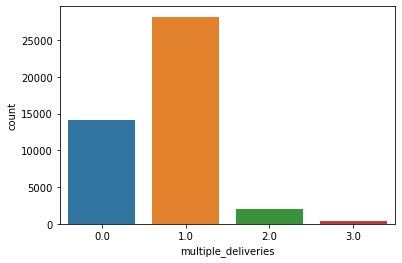

In [90]:
sns.countplot(df1['multiple_deliveries'])

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='multiple_deliveries', ylabel='Density'>

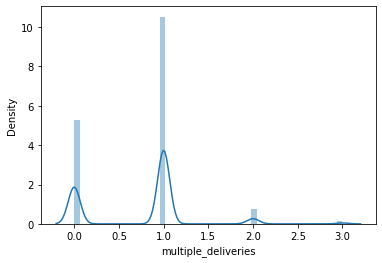

In [91]:
sns.distplot(df1['multiple_deliveries'])

In [92]:
(df1['multiple_deliveries'].isna().sum() / df1.shape[0] ) * 100

2.177965915820411

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Time_taken (min)'>

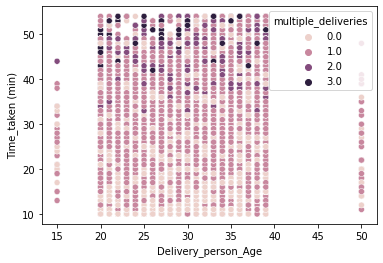

In [93]:
sns.scatterplot(df1['Delivery_person_Age'],df1['Time_taken (min)'],hue=df1['multiple_deliveries'])

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='multiple_deliveries', ylabel='Time_taken (min)'>

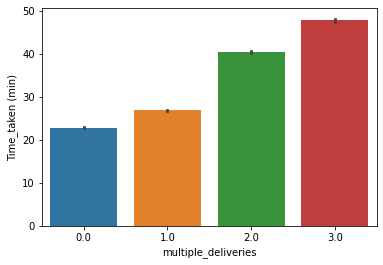

In [94]:
sns.barplot(df1['multiple_deliveries'],df1['Time_taken (min)'])

- Time taken to deliver is highest when mutiple deliveries are 3.

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='multiple_deliveries', ylabel='count'>

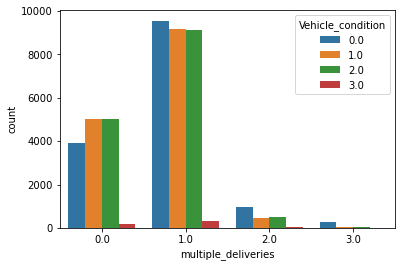

In [95]:
sns.countplot('multiple_deliveries',hue='Vehicle_condition',data=df1)

- Most number of multiple deliveries are done with vehicle condition 0.

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='multiple_deliveries', ylabel='Time_taken (min)'>

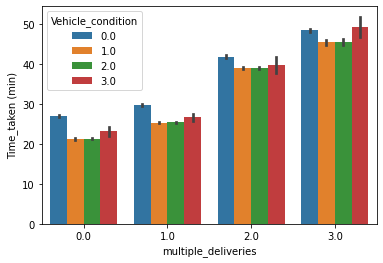

In [96]:
sns.barplot(df1['multiple_deliveries'],df1['Time_taken (min)'],hue=df1['Vehicle_condition'])

- Maximum number of  3 multiple deliveries is done by vehicles with conditon 3.
- Vehicles with condition 1 &2 are efficient in doing multiple deliveries.

### Insights:
- Highest count is of 1 extra deivery which is 28159, which is the mode of the data.
- Mean or median cannot be used to fill the missing values as it is ordinal data.
- 2.17% of the data is missing and this column as has co-relation of 0.39 with target variable.
- Hence, Simple Imputation technique with most frequent value seems relevant to impute missing data

==============================================

- Time taken to deliver is highest when mutiple deliveries are 3.
- Most number of multiple deliveries are done with vehicle condition 0.
- Maximum number of  3 multiple deliveries is done by vehicles with conditon 3.
- Vehicles with condition 1 &2 are efficient in doing multiple deliveries.


### Column: Festival

In [97]:
df1['Festival'].nunique()

2

In [98]:
df1['Festival'].isna().sum()

228

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Festival', ylabel='count'>

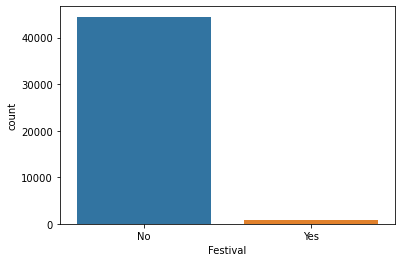

In [99]:
sns.countplot(df1['Festival'])

In [100]:
dfest_yes=df1[df1['Festival']=='Yes'][['Order_Date']]  # Order date when Festival is Yes
dfest_null = df1[df1['Festival'].isnull()][['Order_Date']] # Order dates when Festival is NULL

In [101]:
dfest_yes

,Order_Date
88,2022-02-18
138,2022-03-18
183,2022-03-31
188,2022-04-04
196,2022-03-31
...,...
45169,2022-02-04
45448,2022-03-14
45468,2022-04-03
45524,2022-08-03


In [102]:
dfest_null

,Order_Date
1401,2022-02-17
1406,2022-03-30
1415,2022-03-15
1586,2022-12-03
1623,2022-01-03
...,...
44888,2022-03-30
44965,2022-02-15
45127,2022-03-13
45155,2022-02-03


In [103]:
dfest_yes.shape

(896, 1)

In [104]:
dfest_null.shape

(228, 1)

- Checking how many of the null values are present when Festival = Yes

In [105]:

dfest_null['Present'] = dfest_null['Order_Date'].isin(dfest_yes['Order_Date'])
dfest_null

,Order_Date,Present
1401,2022-02-17,True
1406,2022-03-30,True
1415,2022-03-15,True
1586,2022-12-03,True
1623,2022-01-03,True
...,...,...
44888,2022-03-30,True
44965,2022-02-15,True
45127,2022-03-13,True
45155,2022-02-03,True


In [106]:
dfest_null['Present'].unique()  # All Order dates from NULL values are present when Festival = Yes

array([ True])

In [107]:
# Cross Verifying if our results are correct

In [108]:
dfest_yes['Present']=dfest_yes['Order_Date'].isin(dfest_null['Order_Date'])
dfest_yes['Present'].unique()

array([ True, False])

In [109]:
dfest_null.sample(3)

,Order_Date,Present
19511,2022-02-14,True
25434,2022-03-15,True
30087,2022-03-21,True


In [110]:
# Checking some records from dfest_null, whether they are present in dfest_yes 

dfest_yes[dfest_yes['Order_Date']=='2022-01-04']

,Order_Date,Present
1683,2022-01-04,True
1809,2022-01-04,True
26750,2022-01-04,True
35590,2022-01-04,True
42105,2022-01-04,True


In [111]:
dfest_yes[dfest_yes['Order_Date']=='2022-03-04']

,Order_Date,Present
6959,2022-03-04,True
17703,2022-03-04,True
33828,2022-03-04,True
41885,2022-03-04,True
43714,2022-03-04,True


- Results are verifies. We can say all the dfest_null values in festival are present in dfest_yes

In [112]:
fest_indices = dfest_null.index
fest_indices 

Int64Index([ 1401,  1406,  1415,  1586,  1623,  1708,  1747,  1946,  2210,
             2732,
            ...
            44068, 44087, 44509, 44539, 44883, 44888, 44965, 45127, 45155,
            45173],
           dtype='int64', length=228)

In [113]:
df2 = df1.copy() #For testing

In [114]:
df1.loc[fest_indices , 'Festival'] = "Yes"

In [115]:
df1['Festival'].isna().sum()

0

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Festival', ylabel='count'>

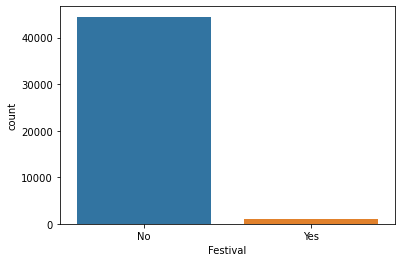

In [116]:
sns.countplot(df1['Festival'])

In [117]:
df1['Festival'].value_counts()

No     44469
Yes     1124
Name: Festival, dtype: int64


- We have checked that the Order Dates of all the Null Values matches to the Order Dates when the Festival was 'Yes'.
- Hence by matching the indices we filled the null values of Festival to 'Yes'.

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Festival', ylabel='Time_taken (min)'>

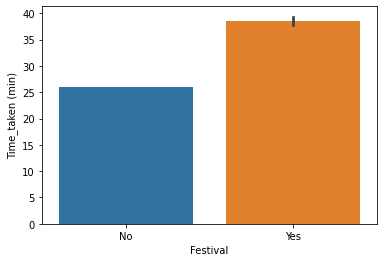

In [118]:
sns.barplot(df1['Festival'],df1['Time_taken (min)'])

- Time taken to deliver orders is more when there are Festivals

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Festival', ylabel='Time_taken (min)'>

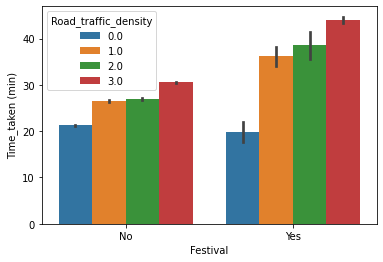

In [119]:
sns.barplot(df1['Festival'],df1['Time_taken (min)'],hue=df1['Road_traffic_density'])

- During Festivals, Number of Traffic Jams are high and Number of High Traffic also increases which increases the delivery time.


C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Festival', ylabel='Time_taken (min)'>

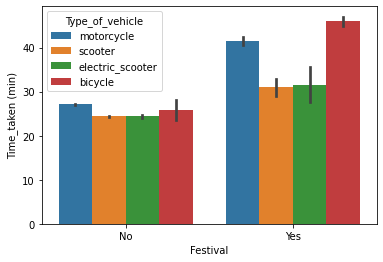

In [120]:
sns.barplot(df1['Festival'],df1['Time_taken (min)'],hue=df1['Type_of_vehicle'])


- During Festivals, scooter is the most efficient as it takes least time to deliver.
- During Festivals, Bicycle is the least efficient as it takes more time to deliver than the rest followed by Motorcycle.
- Motorcycle & Bicycle takes highest time to deliver irrespective of the Festivals. (Both when Festival is Yes & No).

### Insights:

- We have checked that the Order Dates of all the Null Values matches to the Order Dates when the Festival was 'Yes'.
- Hence by matching the indices we filled the null values of Festival to 'Yes'.

====================================================================
- Time taken to deliver orders is more when there are Festivals
- During Festivals, Number of Traffic Jams are high and Number of High Traffic also increases which increases the delivery time.
- During Festivals, scooter is the most efficient as it takes least time to deliver.
- During Festivals, Bicycle is the least efficient as it takes more time to deliver than the rest followed by Motorcycle.
- Motorcycle & Bicycle takes highest time to deliver irrespective of the Festivals. (Both when Festival is Yes & No).


### Column: City 

In [121]:
df1['City'].nunique()

3

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

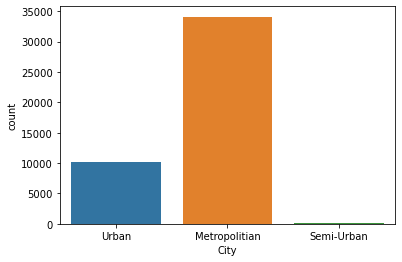

In [122]:
sns.countplot(df1['City'])

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='multiple_deliveries', ylabel='count'>

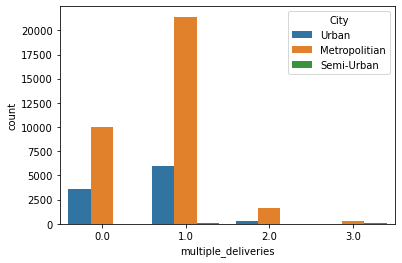

In [123]:
sns.countplot(df1['multiple_deliveries'],hue=df1['City'])

In [124]:
df1.groupby('City')['multiple_deliveries'].value_counts()

City           multiple_deliveries
Metropolitian  1.0                    21395
               0.0                    10026
               2.0                     1683
               3.0                      283
Semi-Urban     1.0                       77
               3.0                       41
               0.0                       24
               2.0                       22
Urban          1.0                     6001
               0.0                     3598
               2.0                      251
               3.0                       33
Name: multiple_deliveries, dtype: int64

In [125]:
(df1['City'].isna().sum() / df1.shape[0] ) *100   # 2.6% of the data is missing

2.631982979843397

In [126]:
df1[df1['City'].isna()] # Data seems to be missing at Random

,Delivery_person_Age,Order_Date,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_Distance(kms),Order_timeDiff,Review
58,32.0,2022-03-26,Windy,0.0,2.0,Buffet,scooter,0.0,No,NaN,20.0,1.489929,15.0,Very Good
116,20.0,2022-03-30,Cloudy,0.0,0.0,Drinks,motorcycle,0.0,No,NaN,16.0,1.554584,15.0,Very Good
140,NaN,2022-09-03,Stormy,0.0,2.0,Snack,scooter,0.0,No,NaN,19.0,4.596584,NaN,NaN
150,26.0,2022-07-03,Sandstorms,0.0,0.0,Buffet,motorcycle,0.0,No,NaN,23.0,9.314899,10.0,Good
206,20.0,2022-03-04,Fog,0.0,1.0,Snack,motorcycle,0.0,No,NaN,11.0,3.116253,10.0,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45417,24.0,2022-03-19,Cloudy,0.0,1.0,Drinks,motorcycle,0.0,No,NaN,16.0,1.520351,15.0,Very Good
45496,37.0,2022-03-26,Sunny,0.0,2.0,Snack,scooter,1.0,No,NaN,12.0,7.761510,15.0,Very Good
45504,NaN,2022-03-17,NaN,NaN,3.0,Meal,scooter,1.0,No,NaN,24.0,17340.730041,NaN,NaN
45550,23.0,2022-11-03,Cloudy,0.0,2.0,Snack,scooter,1.0,No,NaN,12.0,1.512559,5.0,Very Good


- We will fill the missing cities with mode,i.e,Metropolitan cities.
- If the data distribution changes significantly, we can fill the null values with another category called 'Missing'.

In [127]:
df1['City']=df1['City'].fillna('Metropolitian')

In [128]:
df1['City'].isna().sum()

0

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

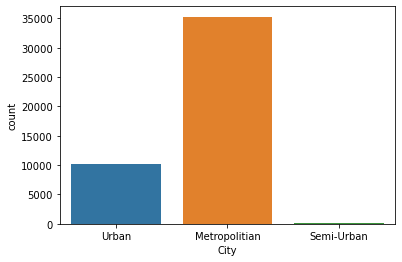

In [129]:
sns.countplot(df1['City'])

In [130]:
df1['City'].value_counts()

Metropolitian    35293
Urban            10136
Semi-Urban         164
Name: City, dtype: int64

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='multiple_deliveries', ylabel='count'>

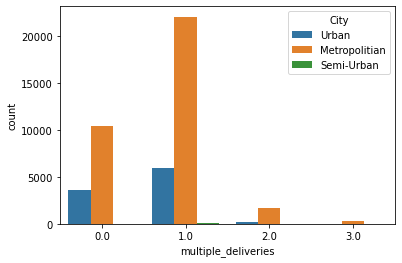

In [131]:
sns.countplot(df1['multiple_deliveries'],hue=df1['City'])

- The distribution does not change significantly hence we will fill the null values with 'Metropolitian'.

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='Time_taken (min)'>

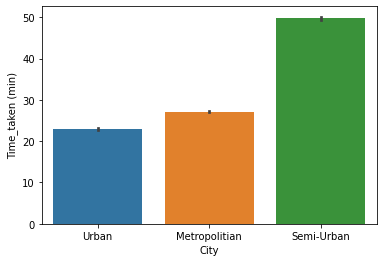

In [132]:
sns.barplot(df1['City'],df1['Time_taken (min)'])

- Semi-Urban cities are taking maximum time to deliver orders
- Urban cities are taking minimum time to deliver orders.

### Insights:
- Mode of the column is 'Metropolitian' which is significantly higher than the rest.
- On checking, we saw that maximum number of multiple_deliveries of all categories are made from Metropolitan cities
- On filling the missing values with mode,'Metropolitian', we checked that the data distribution hasnt changed significantly which is a good sign.



=============================================================
- Semi-Urban cities are taking maximum time to deliver orders
- Urban cities are taking minimum time to deliver orders.


### Column: Order_timeDiff
- Time difference between order placed and order picked.

In [133]:
df1['Order_timeDiff']

0        15.0
1         5.0
2        15.0
3        10.0
4        15.0
         ... 
45588    10.0
45589    15.0
45590    15.0
45591     5.0
45592     5.0
Name: Order_timeDiff, Length: 45593, dtype: float64

In [134]:
df1['Order_timeDiff'].unique()

array([15.,  5., 10., nan])

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Order_timeDiff', ylabel='count'>

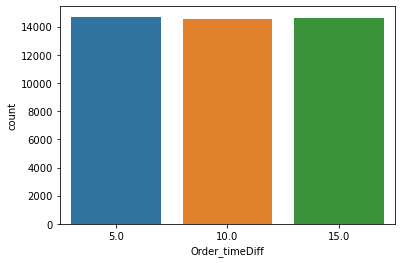

In [135]:
sns.countplot(df1['Order_timeDiff'])

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Order_timeDiff', ylabel='Density'>

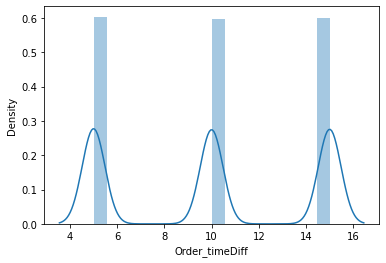

In [136]:
sns.distplot(df1['Order_timeDiff'])

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Order_timeDiff', ylabel='Time_taken (min)'>

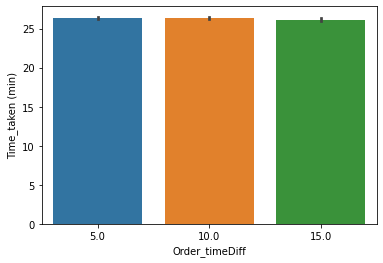

In [137]:
sns.barplot(df1['Order_timeDiff'],df1['Time_taken (min)'])

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Order_timeDiff', ylabel='Time_taken (min)'>

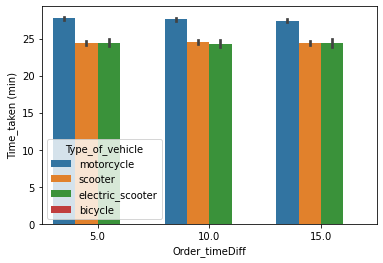

In [138]:
sns.barplot(df1['Order_timeDiff'],df1['Time_taken (min)'],hue=df1['Type_of_vehicle'])

In [139]:
df1[df1['Type_of_vehicle']=='bicycle']['Order_timeDiff'].unique()

array([nan])

### Insights:
- Time difference have 3 unique values however it is a numerical column hence missing values can be imputed through KNN Imputer.

============================================
- Order_timeDiff is missing for all bicycles.
- Motorcycle is taking the maximum time to pickup and deliver orders.
- Scooter is taking the least time to pickup order followed by electric scooter.

### Column: Type_of_order

In [140]:
df1['Type_of_order'].unique()

array(['Snack', 'Drinks', 'Buffet', 'Meal'], dtype=object)

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type_of_order', ylabel='Time_taken (min)'>

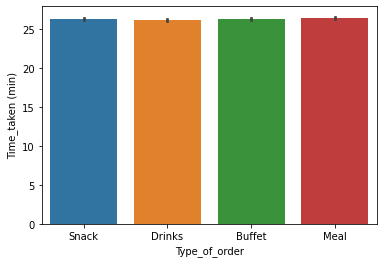

In [141]:
sns.barplot(df1['Type_of_order'],df1['Time_taken (min)'])

- Time taken to deliver all types of Food Orders are nearly same. 
- Time taken is not much dependent on type of Food order

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type_of_order', ylabel='Time_taken (min)'>

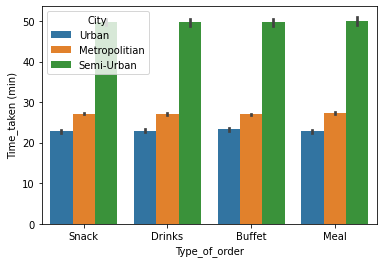

In [142]:
sns.barplot(df1['Type_of_order'],df1['Time_taken (min)'],hue=df1['City'])

- Maximum time is taken in the Semi-Urban Cities to deliver all types of order.

### Insights:
- Time taken to deliver all types of Food Orders are nearly same. 
- Time taken is not much dependent on type of Food order
- Maximum time is taken in the Semi-Urban Cities to deliver all types of order. 

### Column: Type_of_vehicle

In [143]:
df1['Type_of_vehicle'].unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type_of_vehicle', ylabel='Time_taken (min)'>

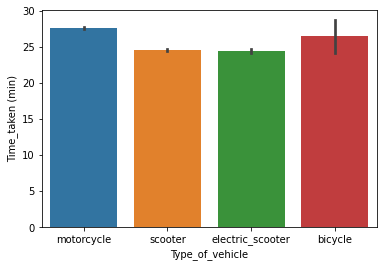

In [144]:
sns.barplot(df1['Type_of_vehicle'],df1['Time_taken (min)'])

- Time taken to deliver order is lesser using scooter & electric scooter
- While more time is taken to deliver the order using motercycle & bicycle
- Most time taken to deliver order is by motorcycle.

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type_of_vehicle', ylabel='Time_taken (min)'>

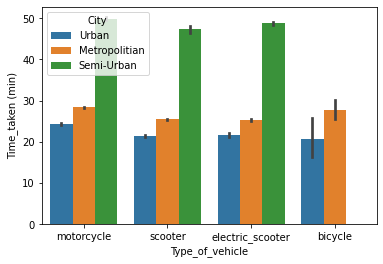

In [145]:
sns.barplot(df1['Type_of_vehicle'],df1['Time_taken (min)'],hue=df1['City'])

- Maximum delivery time is observed at Semi Urban Cities 
- Maximum time is taken by motorcycle followed by electric scooter and then scooter in the Semi-Urban cities.
- Motorcycle is taking the highest time to deliver accross all types of City
- Semi-Urban cities dont have bicycles

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type_of_vehicle', ylabel='Time_taken (min)'>

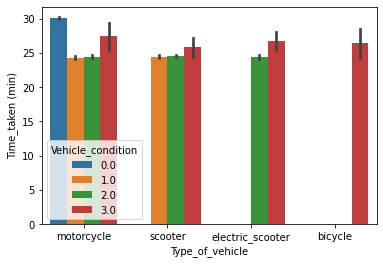

In [146]:
sns.barplot(df1['Type_of_vehicle'],df1['Time_taken (min)'],hue=df1['Vehicle_condition'])

In [147]:
df1[df1['Vehicle_condition']==0]['Type_of_vehicle']

2        motorcycle
3        motorcycle
5        motorcycle
8        motorcycle
12       motorcycle
            ...    
45576    motorcycle
45577    motorcycle
45582    motorcycle
45589    motorcycle
45591    motorcycle
Name: Type_of_vehicle, Length: 15009, dtype: object

In [148]:
df1[df1['Vehicle_condition']==0]['Type_of_vehicle'].unique()

array(['motorcycle'], dtype=object)

### Insights:

- Time taken to deliver order is lesser using scooter & electric scooter
- While more time is taken to deliver the order using motercycle & bicycle
- Most time taken to deliver order is by motorcycle.

======================================================
- Maximum delivery time is observed at Semi Urban Cities 
- Maximum time is taken by motorcycle followed by electric scooter and then scooter in the Semi-Urban cities.
- Motorcycle is taking the highest time to deliver accross all types of City
- Semi-Urban cities dont have bicycles

==========================================================================================
- Motorcycles are taking the maximum time and Only Motorcycles have vehicle condition as 0.
- Maximum vehicles are motorcycle.
- Maximum condition of the motorcycles is 0 followed by condition 3.
- Motorcycles are present in all 4 types of conditions.
- All Bicycles are in condition 3.
- There are no scooter & electric scooter in condition 0.
- Maximum scooters & electric scooters are in condition 3.


In [149]:
df1.isna().sum() #Filled Missing data for Weather conditions, City & Festival columns

Delivery_person_Age       1854
Order_Date                   0
Weather conditions         616
Road_traffic_density       601
Vehicle_condition            0
Type_of_order                0
Type_of_vehicle              0
multiple_deliveries        993
Festival                     0
City                         0
Time_taken (min)             0
Delivery_Distance(kms)       0
Order_timeDiff            1731
Review                    1908
dtype: int64

In [150]:
df1.shape

(45593, 14)

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Order_timeDiff'>

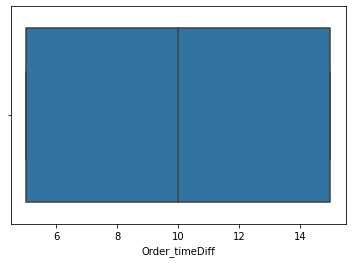

In [151]:
sns.boxplot(df1['Order_timeDiff'])

## Filling Missing Values for the Columns by Train-Test split 

### Train-Test Split 
- Filling the missing values based on the earlier analysis
- Missing values are filled using Train-Test split inorder to ensure unnecessary bias is not introduced in the data.

In [152]:
X = df1.drop(columns=['Time_taken (min)'])
y = df1['Time_taken (min)']

In [153]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=127)

In [154]:
X_train.shape

(36474, 13)

### 1. Column: Delivery_person_Age

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Density'>

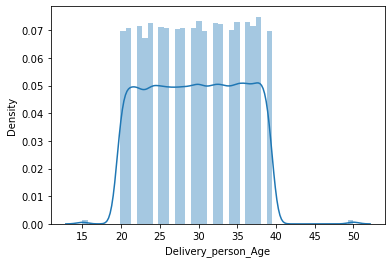

In [155]:
sns.distplot(X_train['Delivery_person_Age'])

In [156]:
age_mean=X_train['Delivery_person_Age'].mean()

In [157]:
X_train['Delivery_person_Age'] = X_train['Delivery_person_Age'].fillna(age_mean) #Filling age with Mean
X_test['Delivery_person_Age'] = X_test['Delivery_person_Age'].fillna(age_mean)

C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/1778180676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Delivery_person_Age'] = X_train['Delivery_person_Age'].fillna(age_mean) #Filling age with Mean
C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/1778180676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Delivery_person_Age'] = X_test['Delivery_person_Age'].fillna(age_mean)


C:\Users\vrati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Density'>

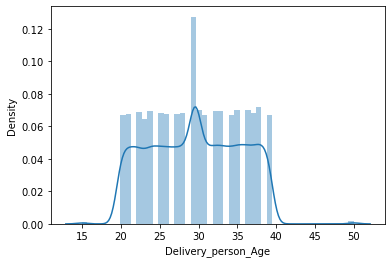

In [158]:
sns.distplot(X_train['Delivery_person_Age'])

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Density'>

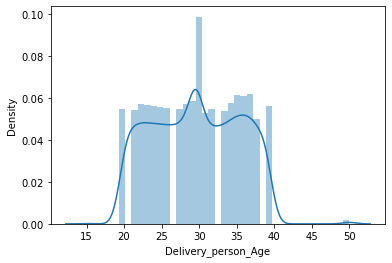

In [159]:
sns.distplot(X_test['Delivery_person_Age'])

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


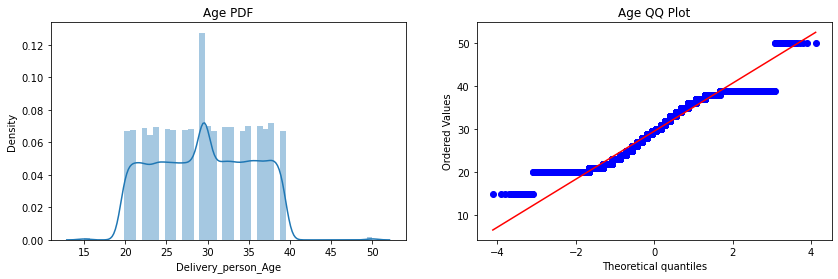

In [160]:
# Distplot & Q-Q Plot of the column
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Delivery_person_Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Delivery_person_Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()  # 

In [161]:
X_train['Delivery_person_Age'].skew()

0.014651946810421175

- Distribution of the column has changed a bit as null values are replaced with mean.
- However skewness of the data is nearly the same hence we can fill null values with mean.

### 2. Column: Review

In [162]:
df1['Review'].isna().sum()

1908

In [163]:
review_mode = df1['Review'].mode()
review_mode.values

array(['Very Good'], dtype=object)

In [164]:
X_train['Review'] = X_train['Review'].fillna('Very Good') #Filling Review with Mode
X_test['Review'] = X_test['Review'].fillna('Very Good')

C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/490822016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Review'] = X_train['Review'].fillna('Very Good') #Filling Review with Mode
C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/490822016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Review'] = X_test['Review'].fillna('Very Good')


C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Review', ylabel='count'>

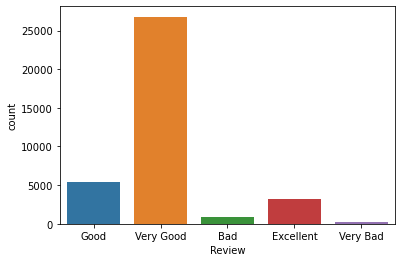

In [165]:
sns.countplot(X_train['Review'])

In [166]:
X_train['Review'].isna().sum()

0

In [167]:
X_test['Review'].isna().sum()

0

### 3. Column: Road_traffic_density

- Imputing Random values from Road_traffic_density column for missing values

In [168]:
X_train['Road_traffic_density_Imputed'] = X_train['Road_traffic_density']
X_test['Road_traffic_density_Imputed'] = X_test['Road_traffic_density']

C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/2356528232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Road_traffic_density_Imputed'] = X_train['Road_traffic_density']
C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/2356528232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Road_traffic_density_Imputed'] = X_test['Road_traffic_density']


In [169]:
X_train['Road_traffic_density_Imputed'][X_train['Road_traffic_density'].isnull()] = X_train['Road_traffic_density'].dropna().sample(X_train['Road_traffic_density'].isnull().sum()).values
X_test['Road_traffic_density_Imputed'][X_test['Road_traffic_density'].isnull()] = X_train['Road_traffic_density'].dropna().sample(X_test['Road_traffic_density'].isnull().sum()).values

C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/2648323849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Road_traffic_density_Imputed'][X_train['Road_traffic_density'].isnull()] = X_train['Road_traffic_density'].dropna().sample(X_train['Road_traffic_density'].isnull().sum()).values
C:\Users\vrati\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/2648323849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

In [170]:
X_train['Road_traffic_density_Imputed'].unique()

array([0., 3., 1., 2.])

In [171]:
X_train.drop(columns=['Road_traffic_density'],inplace=True)
X_test.drop(columns=['Road_traffic_density'],inplace=True)

C:\Users\vrati\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [172]:
X_train.shape

(36474, 13)

In [173]:
X_train.head()

,Delivery_person_Age,Order_Date,Weather conditions,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Delivery_Distance(kms),Order_timeDiff,Review,Road_traffic_density_Imputed
31575,21.0,2022-03-17,Sandstorms,0.0,Snack,motorcycle,1.0,No,Metropolitian,1.552703,15.0,Good,0.0
21817,30.0,2022-04-04,Cloudy,1.0,Drinks,scooter,0.0,No,Metropolitian,19.760095,10.0,Good,3.0
20688,25.0,2022-03-29,Stormy,2.0,Snack,electric_scooter,0.0,No,Metropolitian,10.865693,10.0,Very Good,1.0
11376,25.0,2022-01-04,Sandstorms,0.0,Drinks,motorcycle,0.0,No,Urban,8.938700,5.0,Very Good,0.0
40629,27.0,2022-10-03,Windy,0.0,Buffet,motorcycle,0.0,No,Urban,13.830351,10.0,Good,1.0


### 4. Column: Multiple deliveries

In [174]:
# Simple Imputer = most frequent

In [175]:
imputer = SimpleImputer(strategy='most_frequent')

In [176]:
X_train_mul = imputer.fit_transform(X_train[['multiple_deliveries']])
X_test_mul = imputer.transform(X_test[['multiple_deliveries']])

In [177]:
X_train_mul.shape


(36474, 1)

In [178]:
X_test_mul.shape

(9119, 1)

In [179]:
X_train['multiple_deliveries_imputed'] = X_train_mul
X_test['multiple_deliveries_imputed'] = X_test_mul

C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/4216664902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['multiple_deliveries_imputed'] = X_train_mul
C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/4216664902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['multiple_deliveries_imputed'] = X_test_mul


In [180]:
X_train.drop(columns=['multiple_deliveries'],inplace=True)
X_test.drop(columns=['multiple_deliveries'],inplace=True)

C:\Users\vrati\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [181]:
X_train['multiple_deliveries_imputed'].isna().sum()

0

In [182]:
X_test['multiple_deliveries_imputed'].isna().sum()

0

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='multiple_deliveries_imputed', ylabel='count'>

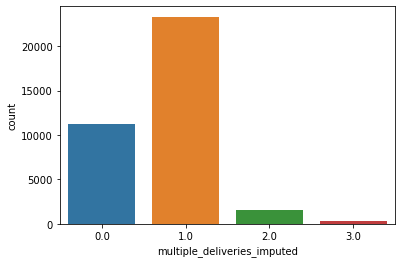

In [183]:
sns.countplot(X_train['multiple_deliveries_imputed'])

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='multiple_deliveries_imputed', ylabel='count'>

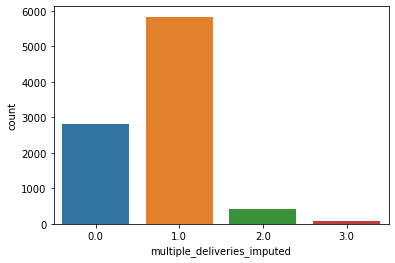

In [184]:
sns.countplot(X_test['multiple_deliveries_imputed'])

### 5. Column: Weather conditions

In [185]:
weather = list(df1['Weather conditions'].unique())
weather

['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan]

In [186]:
X_train['Weather conditions'].fillna(lambda x: random.choice(weather), inplace =True)
X_test['Weather conditions'].fillna(lambda x: random.choice(weather), inplace =True)

C:\Users\vrati\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### 6. Column: Order_timeDiff

- Imputing missing values through KNN Imputer

In [187]:
X_train.isna().sum()

Delivery_person_Age                0
Order_Date                         0
Weather conditions                 0
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
Festival                           0
City                               0
Delivery_Distance(kms)             0
Order_timeDiff                  1421
Review                             0
Road_traffic_density_Imputed       0
multiple_deliveries_imputed        0
dtype: int64

In [188]:
knn = KNNImputer(n_neighbors=5,weights='distance')

In [189]:
X_train_knndf = X_train[['Delivery_person_Age','Vehicle_condition','Delivery_Distance(kms)','Road_traffic_density_Imputed','multiple_deliveries_imputed','Order_timeDiff']]
X_test_knndf = X_test[['Delivery_person_Age','Vehicle_condition','Delivery_Distance(kms)','Road_traffic_density_Imputed','multiple_deliveries_imputed','Order_timeDiff']]

In [190]:
X_train_knndf.head()

,Delivery_person_Age,Vehicle_condition,Delivery_Distance(kms),Road_traffic_density_Imputed,multiple_deliveries_imputed,Order_timeDiff
31575,21.0,0.0,1.552703,0.0,1.0,15.0
21817,30.0,1.0,19.760095,3.0,0.0,10.0
20688,25.0,2.0,10.865693,1.0,0.0,10.0
11376,25.0,0.0,8.938700,0.0,0.0,5.0
40629,27.0,0.0,13.830351,1.0,0.0,10.0


In [191]:
X_train_knndf.isna().sum()

Delivery_person_Age                0
Vehicle_condition                  0
Delivery_Distance(kms)             0
Road_traffic_density_Imputed       0
multiple_deliveries_imputed        0
Order_timeDiff                  1421
dtype: int64

In [192]:
X_test_knndf.isna().sum()

Delivery_person_Age               0
Vehicle_condition                 0
Delivery_Distance(kms)            0
Road_traffic_density_Imputed      0
multiple_deliveries_imputed       0
Order_timeDiff                  310
dtype: int64

In [193]:
X_train_timdiff = knn.fit_transform(X_train_knndf)

X_test_timediff = knn.transform(X_test_knndf)

In [194]:
X_train_timdiff[:,-1]

array([15., 10., 10., ..., 10.,  5., 10.])

In [195]:
X_test_timediff[:,-1]

array([ 5., 10., 10., ...,  5., 10.,  5.])

In [196]:
X_train['Order_timeDiff_imputed'] = X_train_timdiff[:,-1]
X_test['Order_timeDiff_imputed'] = X_test_timediff[:,-1]

C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/1753804487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Order_timeDiff_imputed'] = X_train_timdiff[:,-1]
C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/1753804487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Order_timeDiff_imputed'] = X_test_timediff[:,-1]


In [197]:
X_train[['Order_timeDiff','Order_timeDiff_imputed']].sample(20)

,Order_timeDiff,Order_timeDiff_imputed
45530,10.0,10.000000
21641,15.0,15.000000
8810,10.0,10.000000
18566,10.0,10.000000
37861,15.0,15.000000
25480,NaN,10.058755
18322,15.0,15.000000
13812,15.0,15.000000
15955,10.0,10.000000
13497,15.0,15.000000


In [198]:
X_train.isna().sum()

Delivery_person_Age                0
Order_Date                         0
Weather conditions                 0
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
Festival                           0
City                               0
Delivery_Distance(kms)             0
Order_timeDiff                  1421
Review                             0
Road_traffic_density_Imputed       0
multiple_deliveries_imputed        0
Order_timeDiff_imputed             0
dtype: int64

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Order_timeDiff_imputed', ylabel='Density'>

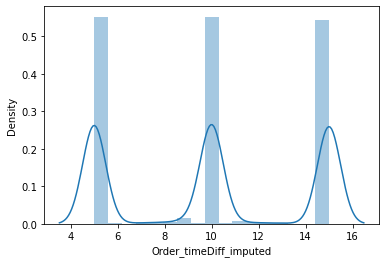

In [199]:
sns.distplot(X_train['Order_timeDiff_imputed']) # The data distribution is nearly the same hence we can go ahead with imputed values

In [200]:
X_train.drop(columns=['Order_timeDiff'],inplace=True)
X_test.drop(columns=['Order_timeDiff'],inplace=True)

C:\Users\vrati\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [201]:
X_train.isna().sum()

Delivery_person_Age             0
Order_Date                      0
Weather conditions              0
Vehicle_condition               0
Type_of_order                   0
Type_of_vehicle                 0
Festival                        0
City                            0
Delivery_Distance(kms)          0
Review                          0
Road_traffic_density_Imputed    0
multiple_deliveries_imputed     0
Order_timeDiff_imputed          0
dtype: int64

In [202]:
X_test.isna().sum()

Delivery_person_Age             0
Order_Date                      0
Weather conditions              0
Vehicle_condition               0
Type_of_order                   0
Type_of_vehicle                 0
Festival                        0
City                            0
Delivery_Distance(kms)          0
Review                          0
Road_traffic_density_Imputed    0
multiple_deliveries_imputed     0
Order_timeDiff_imputed          0
dtype: int64

### All Missing values have been handled

In [203]:
X_train.shape

(36474, 13)

In [204]:
X_test.shape

(9119, 13)

In [205]:
df1.columns

Index(['Delivery_person_Age', 'Order_Date', 'Weather conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'Delivery_Distance(kms)', 'Order_timeDiff',
       'Review'],
      dtype='object')

# Handling Outliers

###  Delivery_Distance(kms)

In [206]:
df1['Delivery_Distance(kms)']

0         3.025154
1        20.183561
2         1.552760
3         7.790414
4         6.210148
           ...    
45588     1.489848
45589    11.007752
45590     4.657203
45591     6.232403
45592    12.074414
Name: Delivery_Distance(kms), Length: 45593, dtype: float64

In [207]:
df1['Delivery_Distance(kms)']=np.around(df1['Delivery_Distance(kms)'],decimals=2)

In [208]:
df1['Delivery_Distance(kms)'].sample(5)

18233     7.76
7585     19.66
3393     16.79
29112    12.26
26557     4.61
Name: Delivery_Distance(kms), dtype: float64

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Distance(kms)', ylabel='Density'>

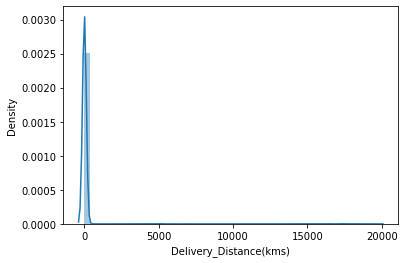

In [209]:
sns.distplot(df1['Delivery_Distance(kms)'])

In [210]:
df1['Delivery_Distance(kms)'].skew()

14.460251933647347

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


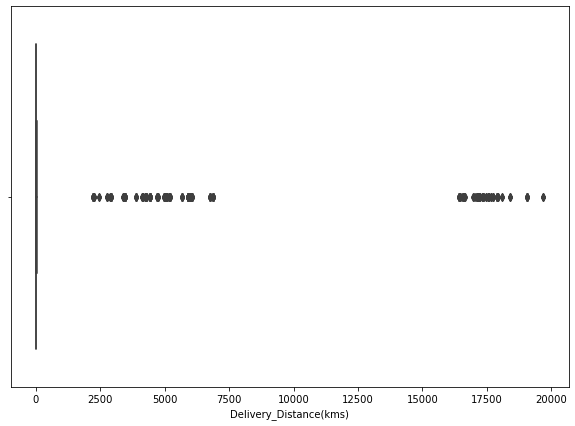

In [211]:
plt.figure(figsize=(10,7))
sns.boxplot(df1['Delivery_Distance(kms)'])
plt.show()

In [212]:
df1['Delivery_Distance(kms)'].min()

1.47

In [213]:
df1['Delivery_Distance(kms)'].max()

19692.71

- Finding boundary values of Outliers as data is skewed. (right skewed)



In [214]:

Q1 = df1['Delivery_Distance(kms)'].quantile(0.25)
Q3 = df1['Delivery_Distance(kms)'].quantile(0.75)
IQR = Q3-Q1

Upper_limit = Q3+1.5*IQR
Lower_limit = Q1-1.5*IQR

print(Upper_limit)
print(Lower_limit)

27.409999999999997
-8.989999999999998


In [215]:
# Since data is right skewed and we checked min value is 1.47, we dont need Lower_limit as it is neagtive.

df1[df1['Delivery_Distance(kms)']>Upper_limit]

,Delivery_person_Age,Order_Date,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_Distance(kms),Order_timeDiff,Review
92,34.0,2022-02-16,Sandstorms,0.0,1.0,Drinks,scooter,0.0,No,Metropolitian,15.0,6048.64,5.0,Very Good
283,32.0,2022-02-13,Sandstorms,3.0,2.0,Meal,scooter,1.0,No,Metropolitian,31.0,6047.93,15.0,Very Good
289,NaN,2022-05-03,Stormy,3.0,2.0,Meal,scooter,0.0,No,Urban,12.0,16612.27,NaN,NaN
425,NaN,2022-02-18,NaN,NaN,3.0,Snack,scooter,1.0,No,Metropolitian,20.0,17744.23,NaN,NaN
534,NaN,2022-03-03,NaN,NaN,3.0,Buffet,scooter,NaN,No,Metropolitian,16.0,17118.86,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44933,30.0,2022-02-15,Fog,0.0,1.0,Buffet,motorcycle,0.0,No,Metropolitian,15.0,4423.28,15.0,Very Good
45020,NaN,2022-03-21,NaN,NaN,3.0,Drinks,electric_scooter,1.0,No,Metropolitian,30.0,4118.49,NaN,NaN
45108,NaN,2022-02-16,Windy,3.0,2.0,Meal,scooter,1.0,No,Urban,19.0,16560.66,NaN,NaN
45182,30.0,2022-02-17,Sandstorms,0.0,0.0,Drinks,motorcycle,1.0,No,Metropolitian,34.0,5895.03,15.0,Good


In [216]:
ul = df1[df1['Delivery_Distance(kms)']>Upper_limit]
ul.shape

(431, 14)

In [217]:
ul.index

Int64Index([   92,   283,   289,   425,   534,   583,   762,  1059,  1091,
             1157,
            ...
            43870, 44051, 44640, 44694, 44769, 44933, 45020, 45108, 45182,
            45504],
           dtype='int64', length=431)

### Capping the outliers to the Upper_limit

In [218]:
df1['Delivery_Distance(kms)_capped'] = np.where(df1['Delivery_Distance(kms)']>Upper_limit,Upper_limit,df1['Delivery_Distance(kms)'])
df1['Delivery_Distance(kms)_capped'].sample(10)

5012      1.51
15591     4.47
10675     6.22
7290     10.87
5110      1.55
44098    19.66
18643    20.83
3212      3.15
8719     13.68
35152     3.03
Name: Delivery_Distance(kms)_capped, dtype: float64

In [219]:
df1['Delivery_Distance(kms)_capped'].max()

27.409999999999997

In [220]:
df1['Delivery_Distance(kms)_capped'].min()

1.47

In [221]:
df1['Delivery_Distance(kms)_capped'] = np.around(df1['Delivery_Distance(kms)_capped'],decimals=2)
df1['Delivery_Distance(kms)_capped'].max()

27.41

C:\Users\vrati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Distance(kms)_capped', ylabel='Density'>

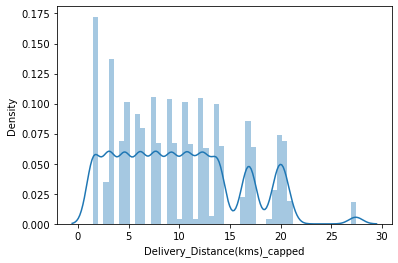

In [222]:
sns.distplot(df1['Delivery_Distance(kms)_capped'])

In [223]:
df1['Delivery_Distance(kms)_capped'].skew() #Skewness has reduced as we needed.

0.46073808823682555

### Performing same operations on train test splitted data

In [224]:
X_train['Delivery_Distance(kms)_capped'] = np.where(X_train['Delivery_Distance(kms)']>Upper_limit,Upper_limit,X_train['Delivery_Distance(kms)'])
X_test['Delivery_Distance(kms)_capped'] = np.where(X_test['Delivery_Distance(kms)']>Upper_limit,Upper_limit,X_test['Delivery_Distance(kms)'])


C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/955402539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Delivery_Distance(kms)_capped'] = np.where(X_train['Delivery_Distance(kms)']>Upper_limit,Upper_limit,X_train['Delivery_Distance(kms)'])
C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/955402539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Delivery_Distance(kms)_capped'] = np.where(X_test['Delivery_Distance(kms)']>Upper_limit,Upper_limit,X_test['Delivery_Distance(kms)'])


In [225]:
X_train[['Delivery_Distance(kms)_capped','Delivery_Distance(kms)']].head()

,Delivery_Distance(kms)_capped,Delivery_Distance(kms)
31575,1.552703,1.552703
21817,19.760095,19.760095
20688,10.865693,10.865693
11376,8.938700,8.938700
40629,13.830351,13.830351


In [226]:
X_test['Delivery_Distance(kms)_capped'].max()

27.409999999999997

In [227]:
X_train['Delivery_Distance(kms)_capped'] = np.around(X_train['Delivery_Distance(kms)_capped'],decimals=2)
X_test['Delivery_Distance(kms)_capped'] = np.around(X_test['Delivery_Distance(kms)_capped'],decimals=2)

C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/2622519632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Delivery_Distance(kms)_capped'] = np.around(X_train['Delivery_Distance(kms)_capped'],decimals=2)
C:\Users\vrati\AppData\Local\Temp/ipykernel_33744/2622519632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Delivery_Distance(kms)_capped'] = np.around(X_test['Delivery_Distance(kms)_capped'],decimals=2)


In [228]:
X_train['Delivery_Distance(kms)_capped'].max()

27.41

In [229]:
X_test['Delivery_Distance(kms)_capped'].max()

27.41

In [230]:
X_test[['Delivery_Distance(kms)_capped','Delivery_Distance(kms)']].head()

,Delivery_Distance(kms)_capped,Delivery_Distance(kms)
28805,9.44,9.435216
2850,7.72,7.720462
42245,10.91,10.906488
40135,6.21,6.209209
20131,14.02,14.021838


In [231]:
X_train.drop(columns=['Delivery_Distance(kms)'],inplace=True)
X_test.drop(columns=['Delivery_Distance(kms)'],inplace=True)

C:\Users\vrati\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Pre-processing 
- Column Transformations, Column Encodings, Removing columns not needing for Modelling

In [232]:
X_train.sample(10)

,Delivery_person_Age,Order_Date,Weather conditions,Vehicle_condition,Type_of_order,Type_of_vehicle,Festival,City,Review,Road_traffic_density_Imputed,multiple_deliveries_imputed,Order_timeDiff_imputed,Delivery_Distance(kms)_capped
44169,35.000000,2022-03-13,Fog,2.0,Meal,scooter,No,Urban,Very Good,0.0,1.0,10.000000,1.55
25502,34.000000,2022-05-03,Sunny,1.0,Buffet,motorcycle,No,Metropolitian,Very Good,3.0,0.0,10.000000,7.56
27773,36.000000,2022-03-16,Sunny,0.0,Drinks,motorcycle,No,Metropolitian,Very Good,3.0,1.0,5.000000,13.58
23430,37.000000,2022-08-03,Sunny,1.0,Snack,scooter,No,Metropolitian,Very Good,0.0,1.0,10.000000,13.58
12120,23.000000,2022-03-26,Windy,2.0,Snack,electric_scooter,No,Metropolitian,Very Good,3.0,1.0,15.000000,9.32
13829,28.000000,2022-06-04,Fog,0.0,Buffet,motorcycle,No,Metropolitian,Very Good,0.0,1.0,10.000000,13.97
14636,22.000000,2022-03-18,Sandstorms,0.0,Buffet,motorcycle,No,Metropolitian,Very Good,0.0,0.0,15.000000,19.76
3950,39.000000,2022-02-16,Stormy,0.0,Meal,motorcycle,No,Metropolitian,Very Good,0.0,1.0,15.000000,19.67
24689,34.000000,2022-03-24,Stormy,1.0,Drinks,scooter,No,Urban,Very Good,2.0,1.0,15.000000,1.51
1952,29.561849,2022-03-29,Cloudy,1.0,Buffet,scooter,No,Metropolitian,Very Good,3.0,1.0,9.538702,10.59


### Removing column Date as it is not required for Modelling

In [233]:
X_train.drop(columns=['Order_Date'],inplace=True)
X_test.drop(columns=['Order_Date'],inplace=True)

C:\Users\vrati\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [234]:
Num_col = X_train[['Delivery_person_Age','Vehicle_condition','Road_traffic_density_Imputed','multiple_deliveries_imputed','Order_timeDiff_imputed','Delivery_Distance(kms)_capped']]
for i in Num_col.columns:
    print(i,"=====>",Num_col[i].skew())

Delivery_person_Age =====> 0.014651946810421175
Vehicle_condition =====> 0.0705012653869513
Road_traffic_density_Imputed =====> 0.2194758489969138
multiple_deliveries_imputed =====> 0.2974541279255771
Order_timeDiff_imputed =====> 0.015503744884405445
Delivery_Distance(kms)_capped =====> 0.4672346593332976


In [235]:
Num_col.sample(5)

,Delivery_person_Age,Vehicle_condition,Road_traffic_density_Imputed,multiple_deliveries_imputed,Order_timeDiff_imputed,Delivery_Distance(kms)_capped
17375,24.0,0.0,0.0,1.0,10.0,3.06
19758,20.0,2.0,3.0,1.0,15.0,7.55
2605,28.0,1.0,2.0,1.0,10.0,6.05
14427,36.0,1.0,1.0,2.0,10.0,7.68
34745,35.0,0.0,1.0,1.0,5.0,13.61


In [236]:
pwd

'C:\\Users\\vrati\\ML\\Portfolio-Project-Order-Delivery-Time-Prediction'

In [237]:
X_train.to_csv('Xtrain1.csv')
X_test.to_csv('Xtest1.csv')
y_train.to_csv('ytrain1.csv')
y_test.to_csv('ytest1.csv')

In [238]:
# Pre-processing in another notebook